In [84]:
import matplotlib.pyplot as plt
import numpy as np

In [85]:
class NetworkComputer:
    def __init__(self, F: int, d: int, u_s: int):
        self.F = F
        self.d = d
        self.u_s = u_s

    def compute_p2p_value(self, N: int, u : int):
        return max(self.F / self.u_s, self.F / self.d, (self.F * N) / (30 + N * u))

    def compute_cs_value(self, N: int, u: int):
        return max(N * self.F / self.u_s, self.F / self.d)

In [86]:
def draw_hyst():
    Ns = [10, 100, 1000]
    us = [0.3, 0.7, 2]
    fig, ax = plt.subplots(layout='constrained', nrows=1, ncols=3, figsize=(22, 12))
    nc = NetworkComputer(15000, 2, 30)
    x = np.arange(len(us))  # the label locations
    for i in range(len(Ns)):
        N = Ns[i]
        width = 0.2  # the width of the bars
        cs_data = []
        p2p_data = []
        for u in us:
            cs_data.append(nc.compute_cs_value(N, u))
            p2p_data.append(nc.compute_p2p_value(N, u))
        cs_rects = ax[i].bar(x, cs_data, width, label="Client-server")
        ax[i].bar_label(cs_rects, padding=3)

        p2p_rects = ax[i].bar(x + width, p2p_data, width, label="Pear to pear")
        ax[i].bar_label(p2p_rects, padding=3)

        ax[i].set_title(f"N = {N}")
        ax[i].legend(loc='upper left', ncols=2)
        ax[i].set_xticks(x + width / 2, list(map(lambda u: f"u = {u} Мбит/с", us)))
        ax[i].set_ylabel("Time (s)")
    plt.show()

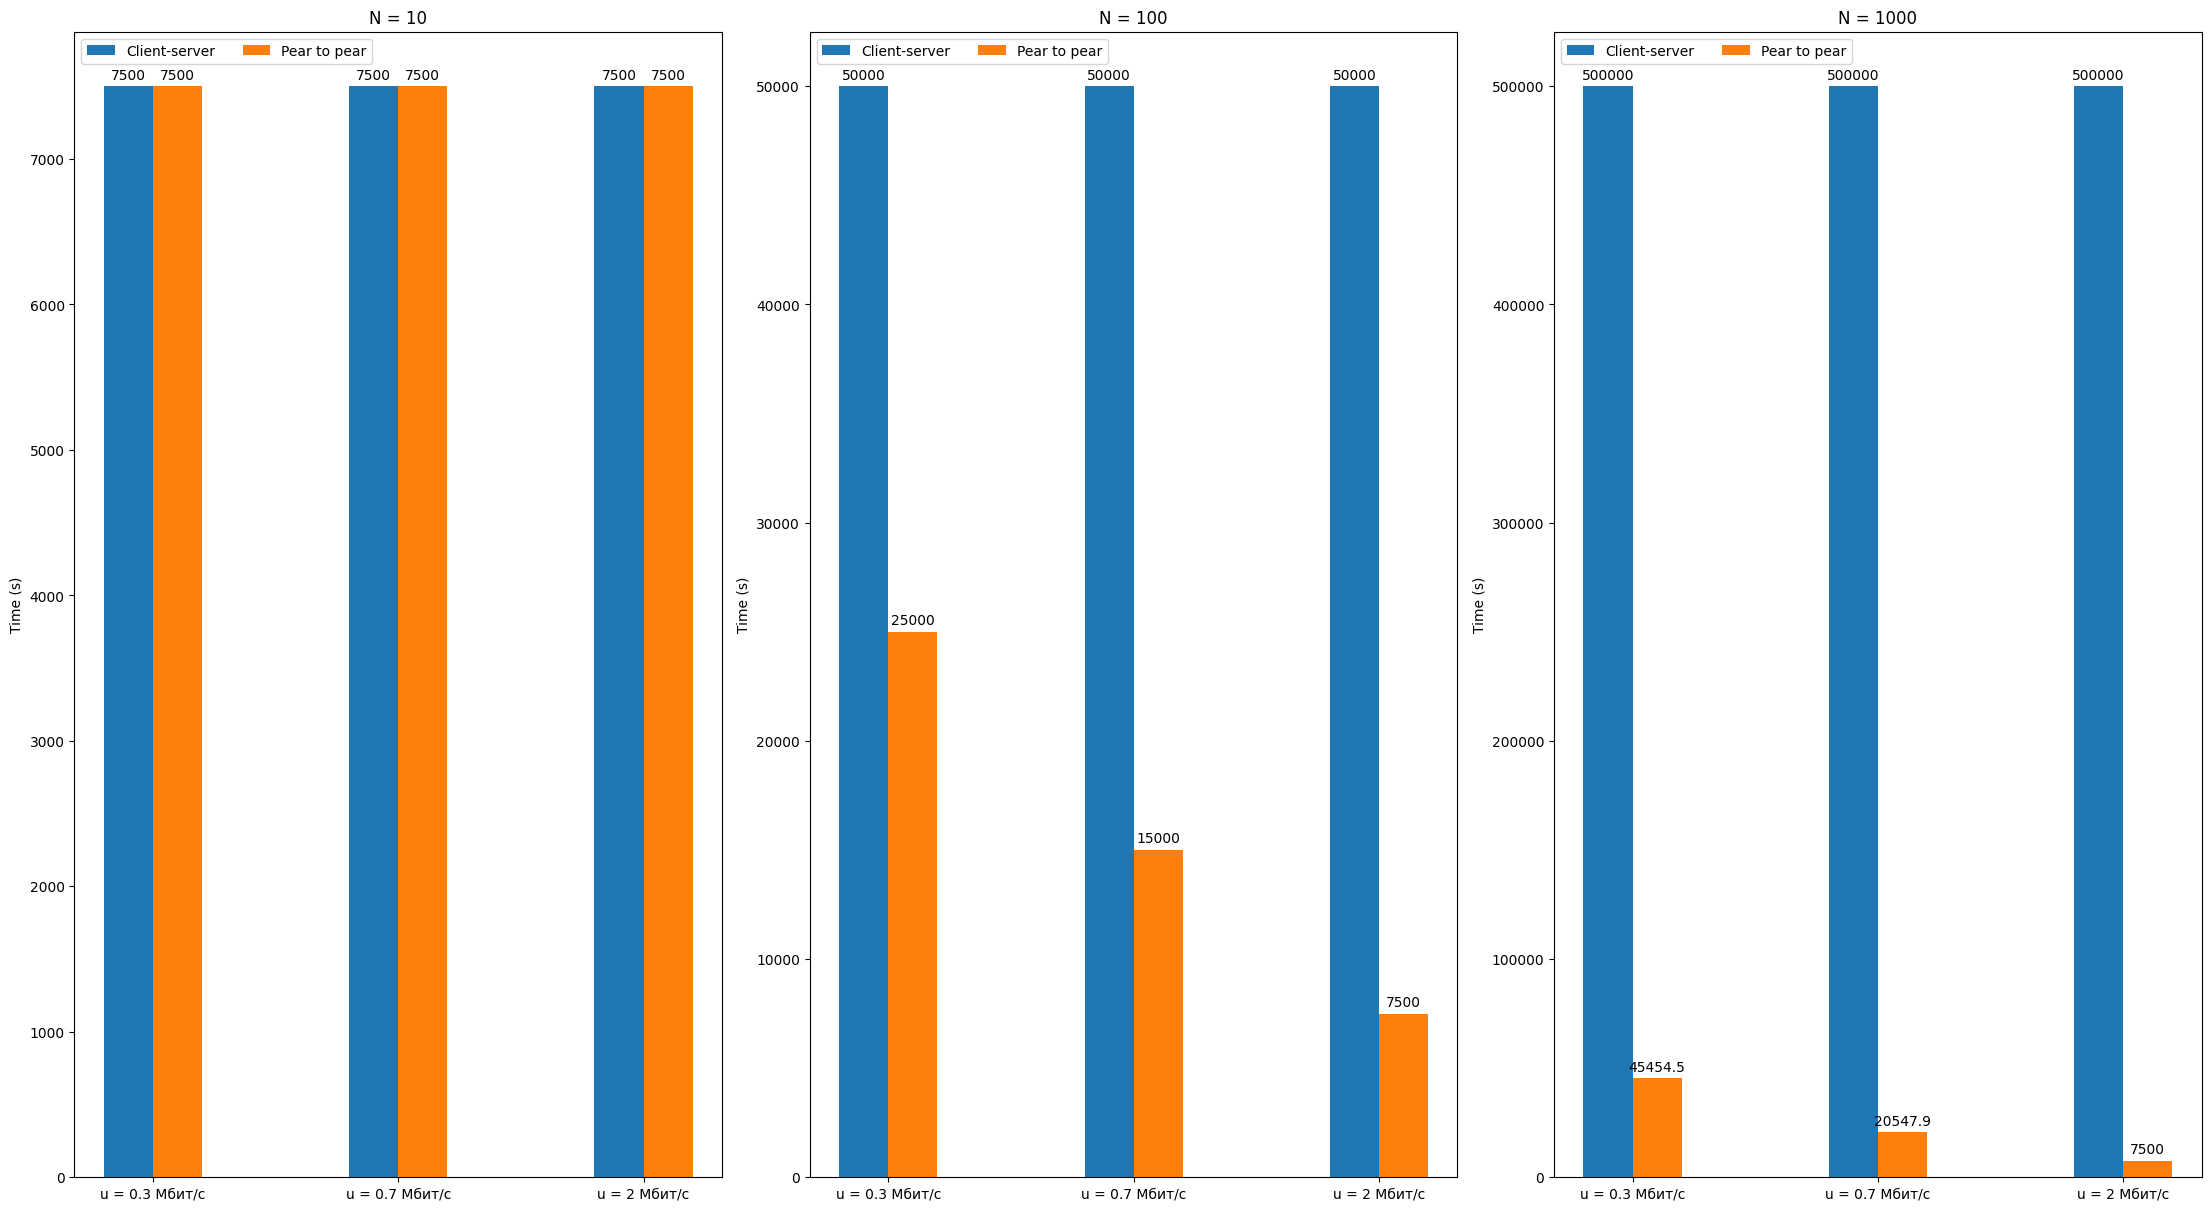

In [87]:
draw_hyst()